In [ ]:
#Importing Libraries

In [10]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [11]:
#Image Properties
Image_Width=128
Image_Height=128
Image_Channel=3
Image_Size=(Image_Width,Image_Height)

In [12]:
#Preparing dataset
#(The code in this cell is inspired from a blog by DATAFLAIR TEAM)
filenames=os.listdir("./Data/train")
categories=[]
for f_name in filenames:
    category=f_name[0]
    if category== "P":
        categories.append(2)
    elif category=="N":
        categories.append(0)
    else:
        categories.append(1)


In [13]:
df=pd.DataFrame({"filenames":filenames,"category":categories})

In [14]:
df

,filenames,category
0,COVID-19 (10).png,1
1,COVID-19 (100).png,1
2,COVID-19 (101).png,1
3,COVID-19 (102).png,1
4,COVID-19 (103).png,1
...,...,...
5357,PNEUMONIA(992).jpg,2
5358,PNEUMONIA(993).jpg,2
5359,PNEUMONIA(994).jpg,2
5360,PNEUMONIA(997).jpg,2


In [15]:
df=df.sample(frac=1).reset_index(drop=True)
df

,filenames,category
0,NORMAL(1050).jpg,0
1,PNEUMONIA(464).jpg,2
2,PNEUMONIA(1857).jpg,2
3,NORMAL(1027).jpg,0
4,PNEUMONIA(1724).jpg,2
...,...,...
5357,PNEUMONIA(2114).jpg,2
5358,NORMAL(955).jpg,0
5359,PNEUMONIA(3170).jpg,2
5360,PNEUMONIA(3914).jpg,2


In [16]:
df["category"]=df["category"].replace({0:"Normal",1:"Corona_Positive",2:"Pneumonia"})
df

,filenames,category
0,NORMAL(1050).jpg,Normal
1,PNEUMONIA(464).jpg,Pneumonia
2,PNEUMONIA(1857).jpg,Pneumonia
3,NORMAL(1027).jpg,Normal
4,PNEUMONIA(1724).jpg,Pneumonia
...,...,...
5357,PNEUMONIA(2114).jpg,Pneumonia
5358,NORMAL(955).jpg,Normal
5359,PNEUMONIA(3170).jpg,Pneumonia
5360,PNEUMONIA(3914).jpg,Pneumonia


In [17]:
train_df,validate_df=train_test_split(df,test_size=0.20,random_state=42)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [18]:
train_df

,filenames,category
0,NORMAL(915).jpg,Normal
1,PNEUMONIA(3675).jpg,Pneumonia
2,PNEUMONIA(3620).jpg,Pneumonia
3,NORMAL(170).jpg,Normal
4,NORMAL(523).jpg,Normal
...,...,...
4284,PNEUMONIA(3762).jpg,Pneumonia
4285,NORMAL(904).jpg,Normal
4286,PNEUMONIA(1867).jpg,Pneumonia
4287,NORMAL(1436).jpg,Normal


In [19]:
validate_df

,filenames,category
0,PNEUMONIA(222).jpg,Pneumonia
1,PNEUMONIA(3036).jpg,Pneumonia
2,PNEUMONIA(3426).jpg,Pneumonia
3,PNEUMONIA(2345).jpg,Pneumonia
4,NORMAL(1259).jpg,Normal
...,...,...
1068,PNEUMONIA(3294).jpg,Pneumonia
1069,NORMAL(1406).jpg,Normal
1070,PNEUMONIA(928).jpg,Pneumonia
1071,PNEUMONIA(1600).jpg,Pneumonia


In [20]:
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=20

In [21]:
total_train,total_validate

(4289, 1073)

In [22]:
train_datagen=ImageDataGenerator(rotation_range=15,rescale=1./255,shear_range=0.1,zoom_range=0.2,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
train_generator=train_datagen.flow_from_dataframe(train_df,"./Data/train",x_col="filenames",y_col="category",target_size=Image_Size,class_mode="categorical",batch_size=batch_size)

Found 4289 validated image filenames belonging to 3 classes.


In [23]:
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_genertor=validation_datagen.flow_from_dataframe(validate_df,"./Data/train",x_col="filenames",y_col="category",target_size=Image_Size,class_mode="categorical",batch_size=batch_size)

Found 1073 validated image filenames belonging to 3 classes.


In [15]:
#Creating neural model
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
model=tf.keras.models.Sequential()
#First Layer
model.add(Conv2D(32,(3,3),input_shape=[128,128,3],activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))
#Second Layer
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))
#Third Layer
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))
#Final Layer
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3,activation="softmax"))


In [39]:
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.SGD(momentum=0.9),metrics=["accuracy"])

In [40]:
#Call backs
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=10)
learning_rate_reduction=ReduceLROnPlateau(monitor="val_accuracy",patience=2,verbose=1,factor=0.5,min_lr=0.00001)
call_backs=[earlystop,learning_rate_reduction]

In [53]:
#Training
epochs=20
history=model.fit_generator(train_generator,epochs=epochs,validation_data=validation_genertor,validation_steps=total_validate/batch_size,steps_per_epoch=total_train/batch_size,callbacks=call_backs)

Epoch 1/20
215/214 [==============================] - 342s 2s/step - loss: 0.2447 - accuracy: 0.9179 - val_loss: 0.3369 - val_accuracy: 0.8695 - lr: 0.0012
Epoch 2/20
215/214 [==============================] - 341s 2s/step - loss: 0.2263 - accuracy: 0.9224 - val_loss: 0.6584 - val_accuracy: 0.7801 - lr: 0.0012
Epoch 3/20
215/214 [==============================] - 340s 2s/step - loss: 0.2143 - accuracy: 0.9280 - val_loss: 0.1970 - val_accuracy: 0.9329 - lr: 0.0012
Epoch 4/20
215/214 [==============================] - 358s 2s/step - loss: 0.2192 - accuracy: 0.9242 - val_loss: 0.2344 - val_accuracy: 0.9282 - lr: 0.0012
Epoch 5/20
215/214 [==============================] - ETA: -1s - loss: 0.2003 - accuracy: 0.9280
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
215/214 [==============================] - 560s 3s/step - loss: 0.2003 - accuracy: 0.9280 - val_loss: 1.7308 - val_accuracy: 0.5098 - lr: 0.0012
Epoch 6/20
215/214 [==============================] - 

In [54]:
#Saving the model
model.save("Covid-19_Predictor.h5")

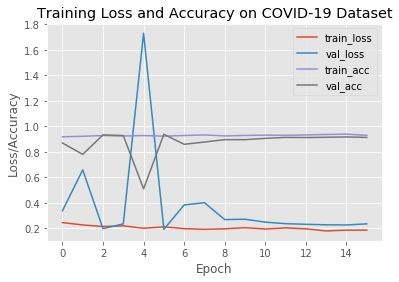

In [69]:
# plotting the training loss and accuracy
epoch = 16
plt.plot(np.arange(0, epoch), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epoch), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epoch), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epoch), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

In [37]:
import tensorflow as tf
import keras
covid1=tf.keras.models.load_model("Covid-19_Predictor.h5")

{'Corona_Positive': 0, 'Normal': 1, 'Pneumonia': 2}

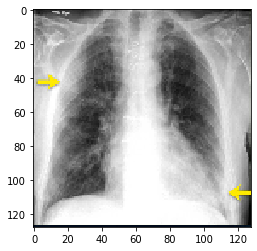

In [57]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img("COVID19(118).jpg",target_size=(128,128))
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=covid1.predict(test_image)
train_generator.class_indices

In [58]:
result

array([[1., 0., 0.]], dtype=float32)

In [60]:
maxi=result[0][0]
max_in=0
for i in result[0]:
    if i> maxi:
        maxi=i
        max_in=list(result[0]).index(i)
if max_in==0:
    print("You are Corona Positive")
elif max_in==1:
    print("You X-Ray is Normal")
else:
    print("You are suffering from Pneumonia")

You are Corona Positive


In this notebook I have not used the concept of transfer learning,so even though the accuracy is high, model might not predict correctly sometimes.Using pretrained models like Vgg-16, and training the model on more images will surely solve the problem.